# Sample Space Reducing Process 

This notebook contains some examples on how to use the python wrapper. 

In [ ]:
import os 
import sys
import matplotlib.pyplot as plt
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import pyssr  

from collections import Counter 

In [2]:
N = 1001 
mu = 1.0 

In [ ]:
%%timeit
ssr = pyssr.CascadeSSR(N, mu)
for _ in range(1000):
    arr = ssr.run()  

1.29 ms ± 358 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%%timeit
ssr = pyssr.CascadeSSR(N, mu)
for _ in range(1000):
    arr = ssr.run(False)  

1.36 ms ± 321 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
N = 101

plt.figure()
for mu in [0.5, 1.0, 1.5, 2.0]:
    ssr = pyssr.CascadeSSR(N, mu)
    visits = []
    for _ in range(1000):
        a = ssr.run()
        visits.extend(a)
    counter = Counter(a)
    counter = counter.most_common()
    labels, values = zip(*counter)
    labels = list(labels)
    values = list(values)
    plt.scatter(labels, values, label=rf"$\mu$ = {mu}")
    plt.xscale("log")
    plt.yscale("log")
plt.legend(loc="best")
plt.show()

ValueError: not enough values to unpack (expected 2, got 0)

<Figure size 640x480 with 0 Axes>

## Zipf's Law in Natural Languages 

[nltk_data] Downloading package punkt to /home/aredjil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


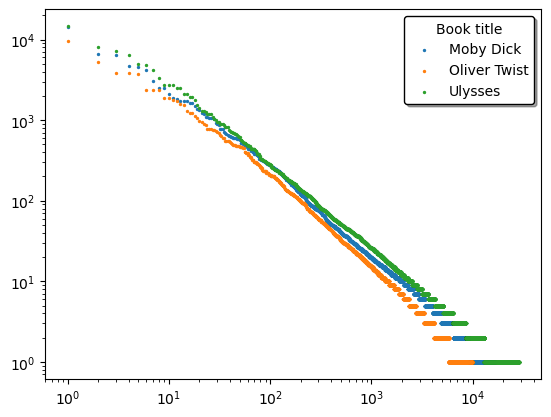

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from pathlib import Path 
from collections import Counter 
import nltk 
nltk.download('punkt')

books = ["Moby-Dick.txt",  "Oliver-Twist.txt",  "Ulysses.txt"]
dir_path = Path().resolve().parent / "data" / "books" 

for book in books: 
    book_path = dir_path / book 
    assert book_path.exists(), f"The file {book_path} does not exist"
    text =book_path.read_text(encoding="utf-8")
    tokens = nltk.word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    counts = Counter(words)
    # Ordering the counts of word 
    counts = counts.most_common()
    ranks = np.arange(1, len(counts) + 1)
    frequencies = [c for _, c in counts]
    plt.scatter(ranks, frequencies, s=2, label=book.replace('-', ' ').removesuffix(".txt"))
    plt.xscale("log")
    plt.yscale("log")
plt.legend(loc="best", frameon=True, edgecolor="black", shadow=True, title="Book title")
plt.show()

## Fitting the Words Count

I will fit the word count to a powerlaw using `powerlaw` package and see the alte  

In [4]:
# function to surpress the prints of the powerlaw package during fitting 
import os 
import sys
import contextlib 
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

In [79]:
import powerlaw 

for book in books: 
    print(f"Processing {book.replace("-", " ").removesuffix(".txt")}")
    book_path = dir_path / book 
    assert book_path.exists(), f"The file {book_path} does not exist"
    text =book_path.read_text(encoding="utf-8")
    tokens = nltk.word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    counts = Counter(words)
    # Ordering the counts of word 
    counts = counts.most_common()
    ranks = np.arange(1, len(counts) + 1)
    freqs = [c for _, c in counts]
    ranked_freqs = np.repeat(ranks, freqs)
    # fit the with power law 
    with suppress_stdout():
        fit = powerlaw.Fit(ranked_freqs, verbose=False, discrete=True, distance="D")
    print("")
    print(f"xmin: {fit.xmin}")
    print(f"alpha: {fit.alpha}")
    print(f"KS distance:{fit.D}")

Processing Moby Dick

xmin: 31.0
alpha: 1.3596440138044055
KS distance:0.11234612035169567
Processing Oliver Twist

xmin: 51.0
alpha: 1.4517380487952758
KS distance:0.11168914757449794
Processing Ulysses

xmin: 11.0
alpha: 1.2720866498119612
KS distance:0.1337148081451528


## Visulizing the Data and the Fit 

Processing Moby Dick
Processing Oliver Twist
Processing Ulysses


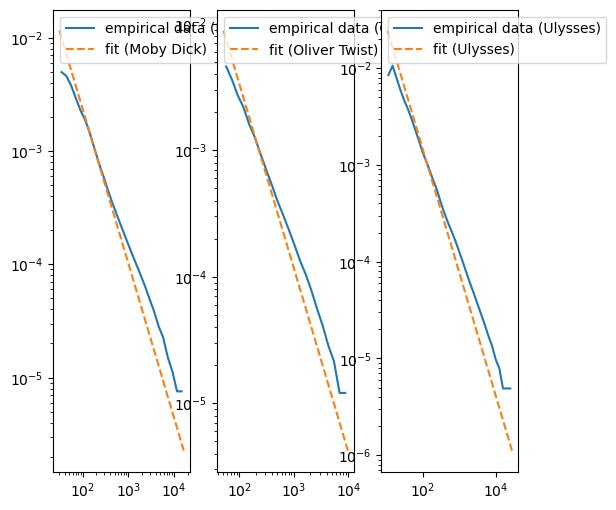

In [7]:
import powerlaw 
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(6, 6))
ax = ax.flatten()
for i, book in enumerate(books): 
    print(f"Processing {book.replace("-", " ").removesuffix(".txt")}")
    book_path = dir_path / book 
    assert book_path.exists(), f"The file {book_path} does not exist"
    text =book_path.read_text(encoding="utf-8")
    tokens = nltk.word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    counts = Counter(words)
    # Ordering the counts of word 
    counts = counts.most_common()
    ranks = np.arange(1, len(counts) + 1)
    freqs = [c for _, c in counts]
    ranked_freqs = np.repeat(ranks, freqs)
    # fit the with power law 
    with suppress_stdout():
        fit = powerlaw.Fit(ranked_freqs, verbose=False, discrete=True, distance="D")
    fit.plot_pdf(label=f"empirical data ({book.replace("-", " ").removesuffix(".txt")})", ax=ax[i])
    fit.power_law.plot_pdf(ls="--", label=f"fit ({book.replace("-", " ").removesuffix(".txt")})", ax=ax[i])
    ax[i].legend(loc="best")
plt.show()

## Figure 1 

*Figure 1* corresponds to the frequency of state visits per state, in the simulation I have used `N=10,000` states, for five values of the multiplicative factor $\mu \in \{0.5, 1.0, 1.5, 2.0, 2.5\}$, each time the `SSR` simulation was ran for a maximum number of iterations `M=1000,000`, the results where then saved in `../data/raw/figure1/`, then the data was converted to a compressed `hdf5` format using the script `./scripts/convert_dataset.py`, the results of the conversion are saved in `../data/processed/hdf5` directory. 

> Note: The directory `../results/figures/figure1/` contain a yaml file with the meta data for the simulation. 

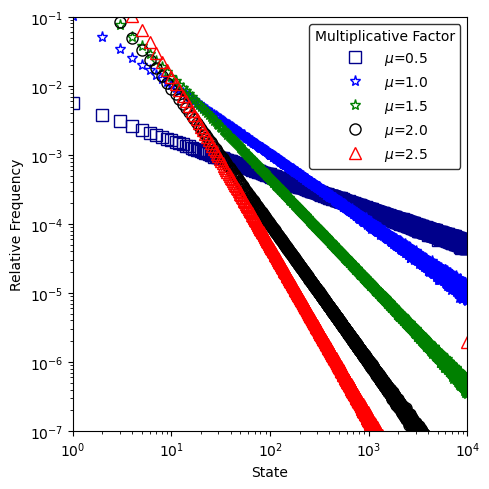

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
from pathlib import Path 
import h5py
import sys 

# Path for the data file
fig1_data_dir = Path().resolve().parent / "data" /"processed" / "hdf5" 
# Checking that the file exits first before attempting to open it 
assert fig1_data_dir.exists(), f"File not found: {file_path}"
# Defining the style to use in the figure 
# Starting with the markers 
markers = [
            "s",
            "*", 
            "*", 
            "o", 
            "^", 
]
# And the color of the corresponding histogram 
colors = ["darkblue", 
          "blue", 
          "green", 
          "black", 
          "red", 
          ]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

for i, mu in enumerate([0.5, 1.0, 1.5, 2.0, 2.5]):
    with h5py.File(fig1_data_dir / f"data_{mu}.h5", "r") as f:
        unique = f["unique"][:]
        count = f["count"][:]
    freq = count / np.sum(count)
    ax.plot(unique, freq, label=r" $\mu$={0}".format(mu), marker=markers[i], markerfacecolor='none', markersize=8, linestyle="None", color=colors[i])
    ax.legend(frameon=True, edgecolor="black", title="Multiplicative Factor")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("State")
    ax.set_ylabel("Relative Frequency")
    ax.set_xlim(1E0, 1E4)
    ax.set_ylim(1E-7, 1E-1)
plt.tight_layout()
plt.show() 

## Figure 2 

*Figure 2* was produced by running the `SSR` simulation for different numbers of states `n_states` ranging from $200$ to $800$ using $20$ values of the multiplicative factor $\mu \in [1.5, 3.5]$. 

- [ ] Explain the math behind the figure

In [111]:
# Importing the necessary libaries 
import sys
import os

# In order to import the pyssr module after compilation 
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
import pyssr # SSR module 
from tqdm import tqdm 
import numpy as np 
from scipy.stats import gamma
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [90]:
# To show case how to use the python module to generate the data for the figure I decided to 
# Generate the data here and use it to reproduce the figure 2, a better (faster) approach would be 
# To geenrate the data with C++ code save it as a .txt file then load it and process it 
# in the notebook and viuslize the results
n_states = [200, 400, 600, 800]
mus = np.linspace(1.5, 3.5, 20).round(1)
n_iter = 3000


av_avalanche_sizes = []
for N in n_states:
    av_avalanche_s = []
    print(f"\rN = {N}")
    print("")
    for mu in mus:
        print(f"\rmu = {mu}", end='', flush=True)
        sizes = np.zeros(n_iter)
        for j in range(n_iter):
            path = simulation.ssr_casc(N, mu)
            sizes[j] = len(path)
        av_avalanche_s.append(sizes.mean())
    av_avalanche_sizes.append(av_avalanche_s)

N = 200
N = 4005
N = 6005
N = 8005
mu = 3.5

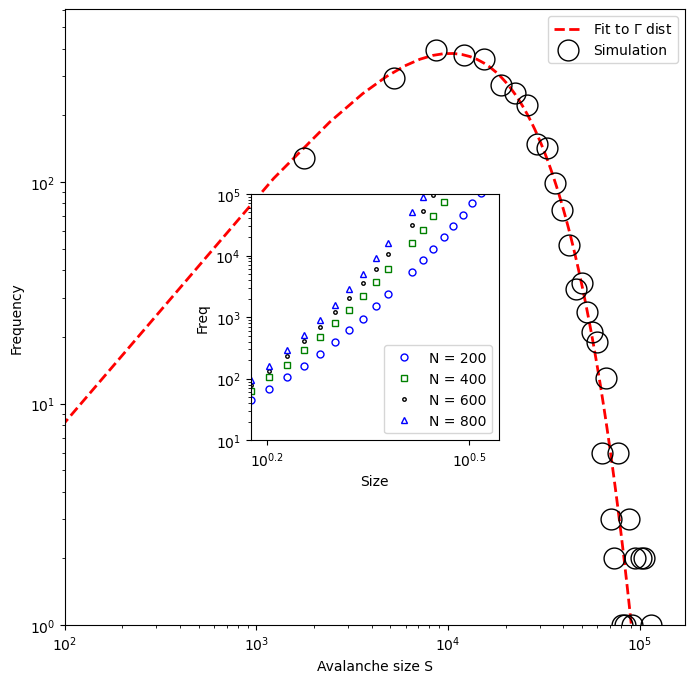

In [110]:
# Marker and colors for the inner figure 
from matplotlib.ticker import NullFormatter, FixedLocator

markers = ["o", "s", ".", "^"]
colors = ["blue", "green", "black", "blue"]
xticks = [10**0.2, 10**0.5]
xtick_labels = [r'$10^{0.2}$', r'$10^{0.5}$']

counts, bin_edges = np.histogram(avalanche_sizes, bins=34, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

shape, loc, scale = gamma.fit(avalanche_sizes, floc=0)

# Gamma PDF scaled to counts scale
x = np.linspace(min(avalanche_sizes), max(avalanche_sizes), 100)
pdf = gamma.pdf(x, shape, loc=loc, scale=scale)
scaled_pdf = pdf * len(avalanche_sizes) * bin_width

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, scaled_pdf, 'r--', linewidth=2, label=r'Fit to $\Gamma$ dist')
ax.plot(bin_centers, counts, linestyle='None',
        marker='o', markerfacecolor='none', markersize=15,
        markeredgecolor='black', label='Simulation')

ax.set_ylabel("Frequency")
ax.set_xlabel("Avalanche size S")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1E2, )
ax.set_ylim(1E0, )
ax.legend(loc="best")

ax_inset = inset_axes(ax, width="40%", height="40%", loc='center')

for i, N in enumerate(n_states): 
    ax_inset.plot(mus, av_avalanche_sizes[i],
              linestyle='None',
              marker=markers[i],
              color=colors[i],
              markerfacecolor='none',
              markeredgecolor=colors[i],
              markersize=5,
              label=f"N = {N}")
ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.set_title("")
ax_inset.set_ylim(1E1, 1E5)
ax_inset.set_xlim(mus[0], mus[-1])
ax_inset.set_xticks(xticks, xtick_labels)

ax_inset.set_xlabel("Size")
ax_inset.set_ylabel("Freq")
axis = plt.gca()
axis.xaxis.set_minor_locator(FixedLocator([]))
axis.xaxis.set_minor_formatter(NullFormatter())

ax_inset.legend()

plt.show()